<a href="https://colab.research.google.com/github/NegarMirgati/Time_Series_Prediction/blob/master/holtwinters_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path to the folder
%cd /content/drive/MyDrive/time_series_analysis_course/Capstone_Project_Airmiles

/content/drive/MyDrive/time_series_analysis_course/Capstone_Project_Airmiles


In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

In [4]:
# Loading the Data of weekly customer complaints
# and set the date as the index
df = pd.read_csv("airmiles.csv", index_col="Date", parse_dates = True, dayfirst = True)
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [5]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [6]:
df['airmiles'] = df['airmiles'].astype(float)
df.head()

,airmiles
Date,
1996-01-01,30983174.0
1996-02-01,32147663.0
1996-03-01,38342975.0
1996-04-01,35969113.0
1996-05-01,36474391.0


In [7]:
# convert the time series data to a specified frequency, in this case, monthly data with Monday as the anchor day.
# Setting freq to W implies that the week starts on a Sunday
df = df.asfreq("MS")
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [8]:
df.head()

,airmiles
Date,
1996-01-01,30983174.0
1996-02-01,32147663.0
1996-03-01,38342975.0
1996-04-01,35969113.0
1996-05-01,36474391.0


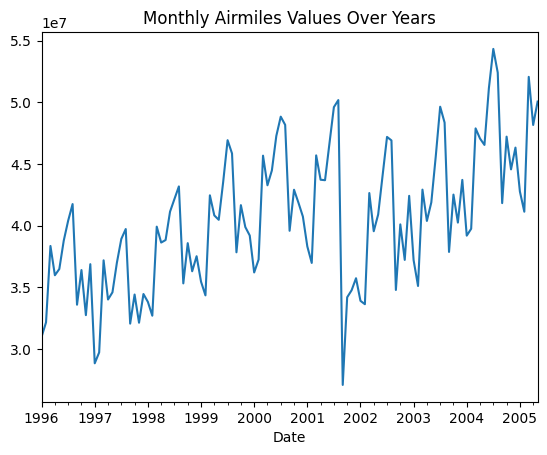

In [49]:
# Plot the weekly complaint values
df['airmiles'].plot(title = 'Monthly Airmiles Values Over Years')
plt.show()

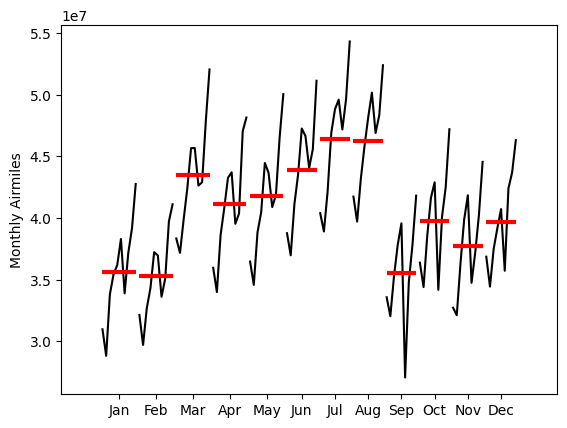

In [10]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of the complaint values
month_plot(df['airmiles'].resample('MS').mean(),
           ylabel = 'Monthly Airmiles')
plt.show()

<ipython-input-11-171af1fb615b>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['airmiles'].resample('Q').mean(),


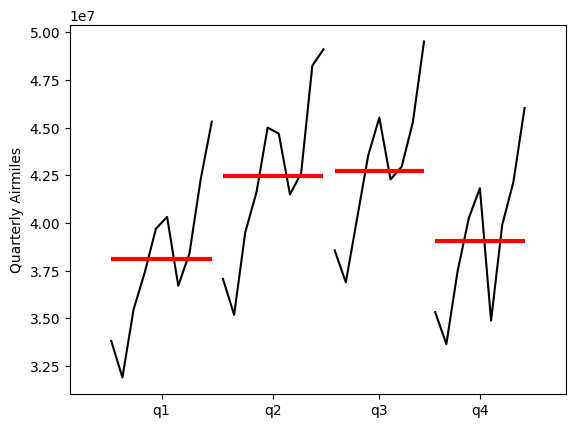

In [11]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of the complaint values
quarter_plot(df['airmiles'].resample('Q').mean(),
           ylabel = 'Quarterly Airmiles')
plt.show()

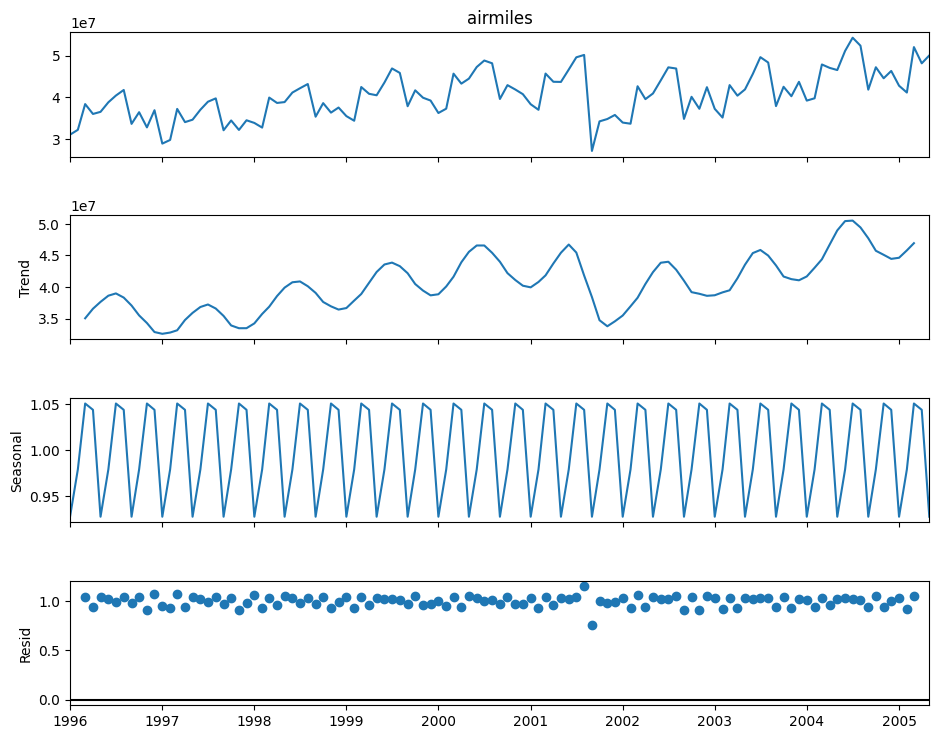

In [12]:
# Seasonal Decomposition Plots for complaint values
# Multiplicative model type, with quarterly seasonality (4 weeks)
decomposition = seasonal_decompose(df['airmiles'],
                                   model = 'mul',
                                   period = 4)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

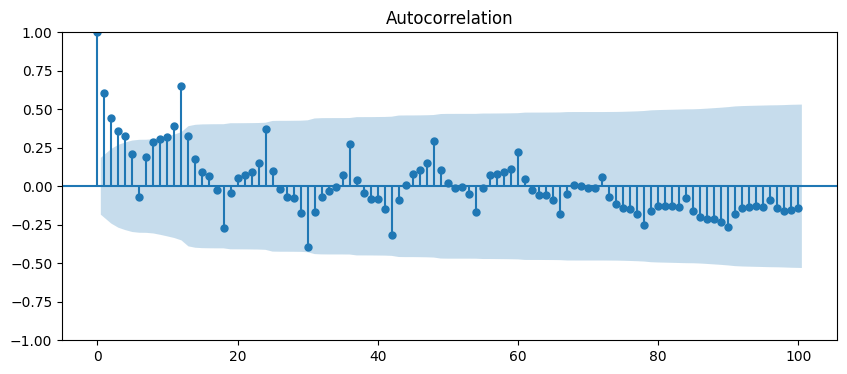

In [13]:
# Plot the autocorrelation (ACF) of complaint values
fig, ax = plt.subplots(figsize = (10,4))
plot_acf(df['airmiles'], lags = 100, ax = ax)
plt.show()

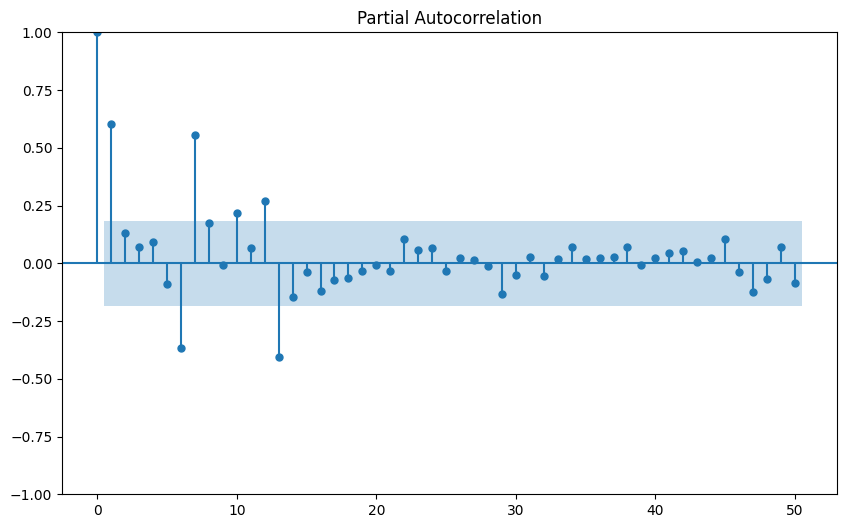

In [14]:
# Plot the partial autocorrelation (PACF) of complaint values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['airmiles'], lags = 50, ax = ax)
plt.show()

In [15]:
# Training and Test Split
# Train: all data except last n periods of the column 'complaints'
# Test: last n periods of the column 'complaints'

periods = 12
train, test = df.iloc[:-periods,0], df.iloc[-periods:, 0 ]
test.head()

,airmiles
Date,
2004-06-01,51134050.0
2004-07-01,54317314.0
2004-08-01,52392985.0
2004-09-01,41816777.0
2004-10-01,47205665.0


In [45]:
# Triple Exponential Smoothing Model
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the training data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 52 (weekly data with yearly seasonality)

model_triple = ExponentialSmoothing(train,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 12).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [46]:
# Use the fitted Triple Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_triple = model_triple.forecast(len(test))
predictions_triple

,0
2004-06-01,4.989814e+07
2004-07-01,5.232020e+07
2004-08-01,5.246731e+07
2004-09-01,4.147231e+07
2004-10-01,4.632250e+07
2004-11-01,4.366543e+07
2004-12-01,4.583298e+07
2005-01-01,4.142760e+07
2005-02-01,4.104454e+07
2005-03-01,5.053423e+07


In [47]:
def my_model_assess(real_data_test, real_data_train, pred_data):
  mae = mean_absolute_error(real_data_test, pred_data)
  rmse = root_mean_squared_error(real_data_test, pred_data)
  mape = mean_absolute_percentage_error(real_data_test, pred_data)

  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))

  # Plot train, test, and forecasts values
  plt.plot(real_data_test, label = 'Test')
  plt.plot(real_data_train, label = 'Train')
  plt.plot(pred_data, label = "Forecast")

  # add title and legend to the plot
  plt.title("Train, Test and Predictions with Triple Exponential Smoothing")
  plt.legend()
  plt.show()

The MAE is 877575.16
The RMSE is 1075653.07
The MAPE is 1.80 %


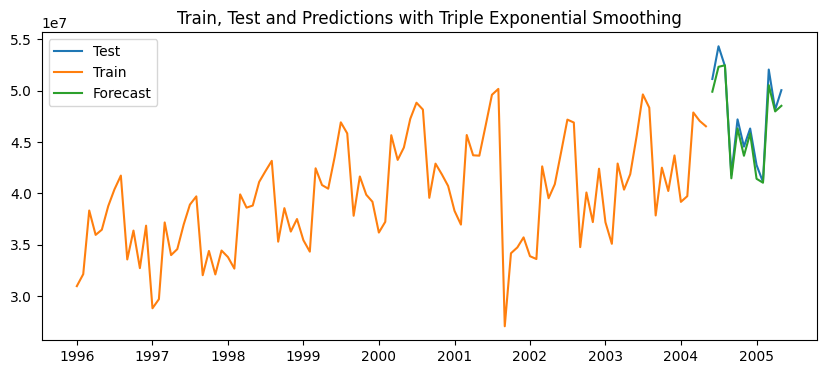

In [48]:
my_model_assess(test, train, predictions_triple)